Шаг 1. Открываем файл с данными и изучаем общую информацию

In [2]:
# Подключаем библиотеку pandas
import pandas as pd

# Открываем файл с данными и изучаем общую информацию
data = pd.read_csv('D:/CSV/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Необходимые следующие действия для корректировки данных:

- Все названия столбцов изменить на нижний регистр
- Год выпуска изменить значение на целочисленного типа, т.к. преобразовать в datetime64 можно, но он будет выводить как "год - месяц - день", что для визуального вида неудобно
- Оценки критиков лучше изменить на целочисленного типа, поскольку оценивается по стобальной шкале. Если они оценивали по 10-бальной шкале, то лучше всего оставить вещественными числами для точной оценки
- Оценки пользователя изменим на вещественного типа. Аббревиатура 'TBD' расшифровывается как 'To Be Determined', т.е. 'Будет определено'. Следовательно, если в строке таких будут, то они по умолчанию не определены, аналогично как NaN, NA.  

Шаг 2. Подготовим данные

In [5]:
# Изменим все названия столбцов на нижний регистр
data = data.rename(str.lower, axis='columns')

In [6]:
# Изменим тип данных год выпуска на Int32
data['year_of_release'] = data['year_of_release'].astype('Int32')

In [7]:
# Изменим тип данных оценки критиков на Int32
data['critic_score'] = data['critic_score'].astype('Int32')

Обработаем пропущенные значения

In [8]:
# Смотрим кол-во пропущенных значений
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Следующие действия для обработки пропущенных данных:
- Названий игр не можем заполнить пропущенные значения, т.к. этот столбец является уникальной значенией (категоризацией). Кол-во строк очень маленькое - 2, можем удалить их
- Установить год релиза можно, если покопаться с названием игры и узнать их год релиза. Но таких строк много, составляет 269 единиц. Оставим их как и есть
- Оценку критиков и пользователей можно заполнить медианной значений. Пропущенные значения этих столбцов свидительствуют о многих причинах: 
    - игра буквально только что вышла, оценивать не успели
    - локальная игра, т.е. разработали игру исключительно для себя/друзей, не для публик
    - игра, которая не заслуживает рейтинга
- Заполнить пропущенные значения рейтинга можно, если опять же все таки покопаться в интернете, узнать рейтинг названия игры и установить её. Оставим их как и есть

In [9]:
# Удалим список игр, в которых названия отсутствуют
data = data.dropna(subset=['name'])

In [10]:
print('Медианное значение оценок критик:', data[~data['critic_score'].isna()]['critic_score'].median())

Медианное значение оценок критик: 71.0


In [11]:
# Оценку критиков заполним медианной значений
data['critic_score'] = data['critic_score'].fillna(data[~data['critic_score'].isna()]['critic_score'].median())

In [12]:
# Находим уникальные значения оценки пользователя, чтобы корректировать значения, 
# потому что не получается преобразовать в вещественное число, если есть хотя бы один символ в строке
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [13]:
# Изменим 'tbd' на None
data['user_score'] = data['user_score'].replace('tbd', None)

# И изменим тип данных на вещественное число
data['user_score'] = data['user_score'].astype(float)

In [14]:
print('Медианное значение оценок пользователей:', data[~data['user_score'].isna()]['user_score'].median())

Медианное значение оценок пользователей: 7.5


In [15]:
# Оценку пользователей заполним медианной значений
data['user_score'] = data['user_score'].fillna(data[~data['user_score'].isna()]['user_score'].median())

In [16]:
# Смотрим кол-во пропущенных значений
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

In [17]:
# Посчитаем суммарные продажи по региону: NA, EU, JP
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [18]:
# После подготовки данных смотрим на таблицу и убедимся в правильных решениях
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71,7.5,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71,7.5,NaN,31.38


Шаг 3. Проведем исследовательский анализ данных

In [19]:
# Находим кол-во игр, выпущенных определенный промежуток года
count_game_year = data.pivot_table(index = ['year_of_release', 'platform'], values = 'name', aggfunc = 'count')
count_game_year = count_game_year.rename(columns = {'name': 'count_game'})
count_game_year.head()

count_game
year_of_release platform            
1980            2600               9
1981            2600              46
1982            2600              36
1983            2600              11
                NES                6

In [20]:
count_game_year.tail()

count_game
year_of_release platform            
2016            PSV               85
                Wii                1
                WiiU              14
                X360              13
                XOne              87

Здесь можно заметить, что кол-во выпущенных игр растет, но не линейно. Рассмотрим на общей графике

<AxesSubplot:title={'center':'Кол-во игр, выпущенных за год'}, ylabel='year_of_release'>

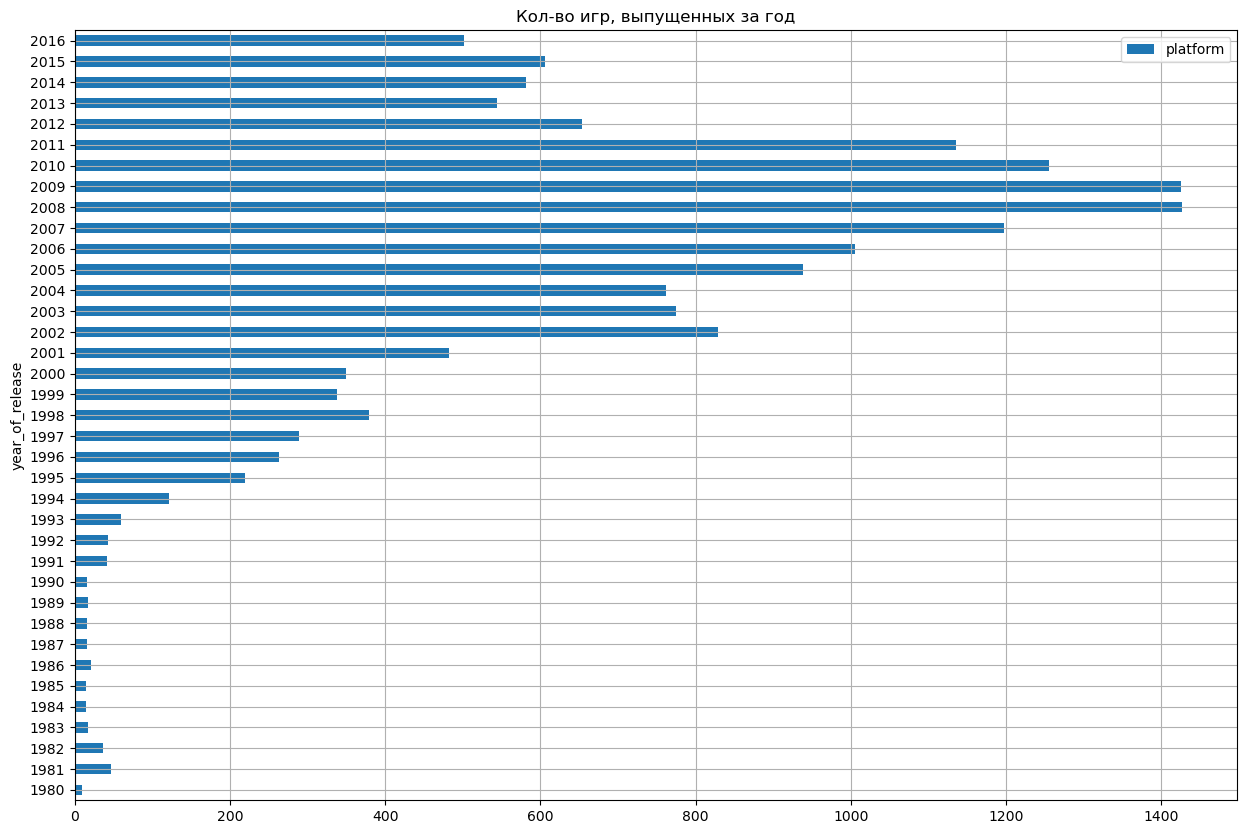

In [21]:
data.pivot_table(index = 'year_of_release', values = 'platform', aggfunc = 'count').plot(
                                                                                                    kind = 'barh',
                                                                                                    title = 'Кол-во игр, выпущенных за год',
                                                                                                    grid = True,
                                                                                                    figsize = (15, 10))

<AxesSubplot:xlabel='year_of_release'>

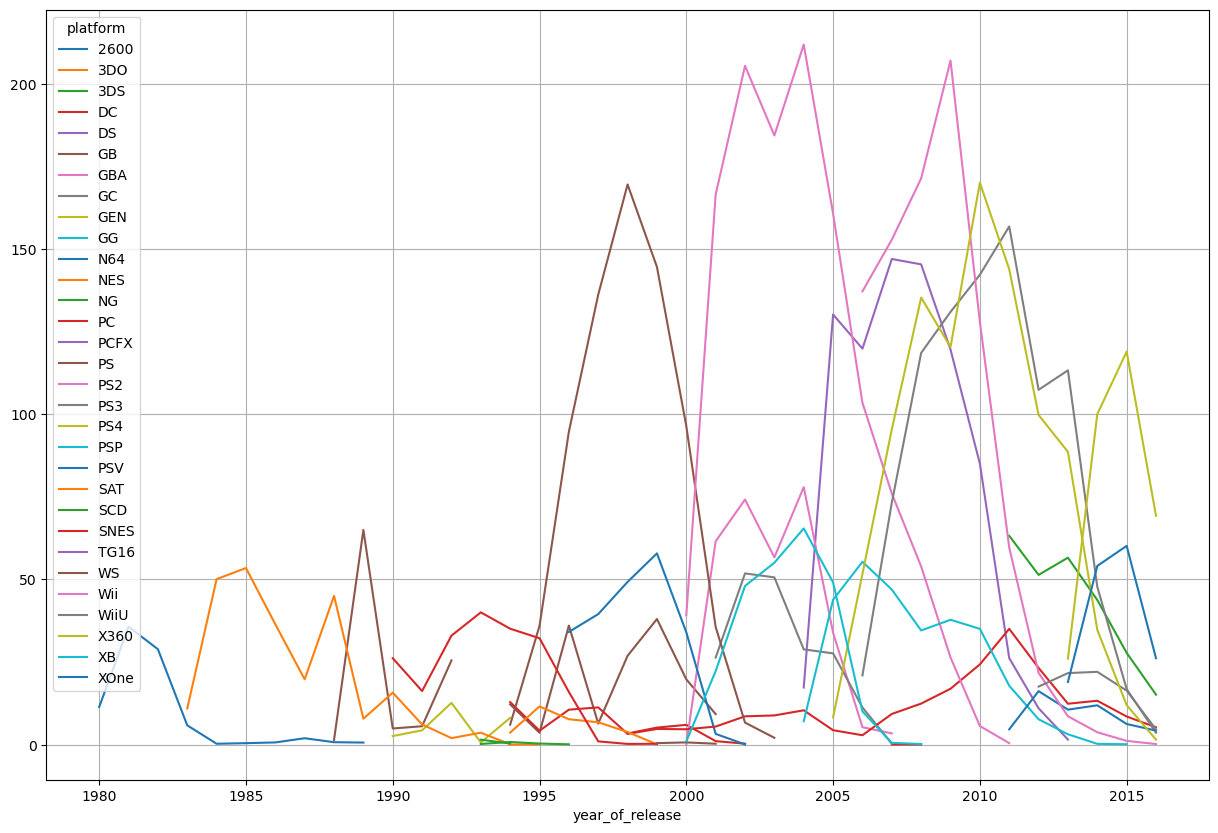

In [22]:
data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum').plot(grid=True, figsize=(15, 10))

Здесь можно заметить, что в периоде 2005 - 2010 годах некоторые приставки и устройства появились и исчезались. Рассмотрим это в отдельном графике

<AxesSubplot:xlabel='year_of_release'>

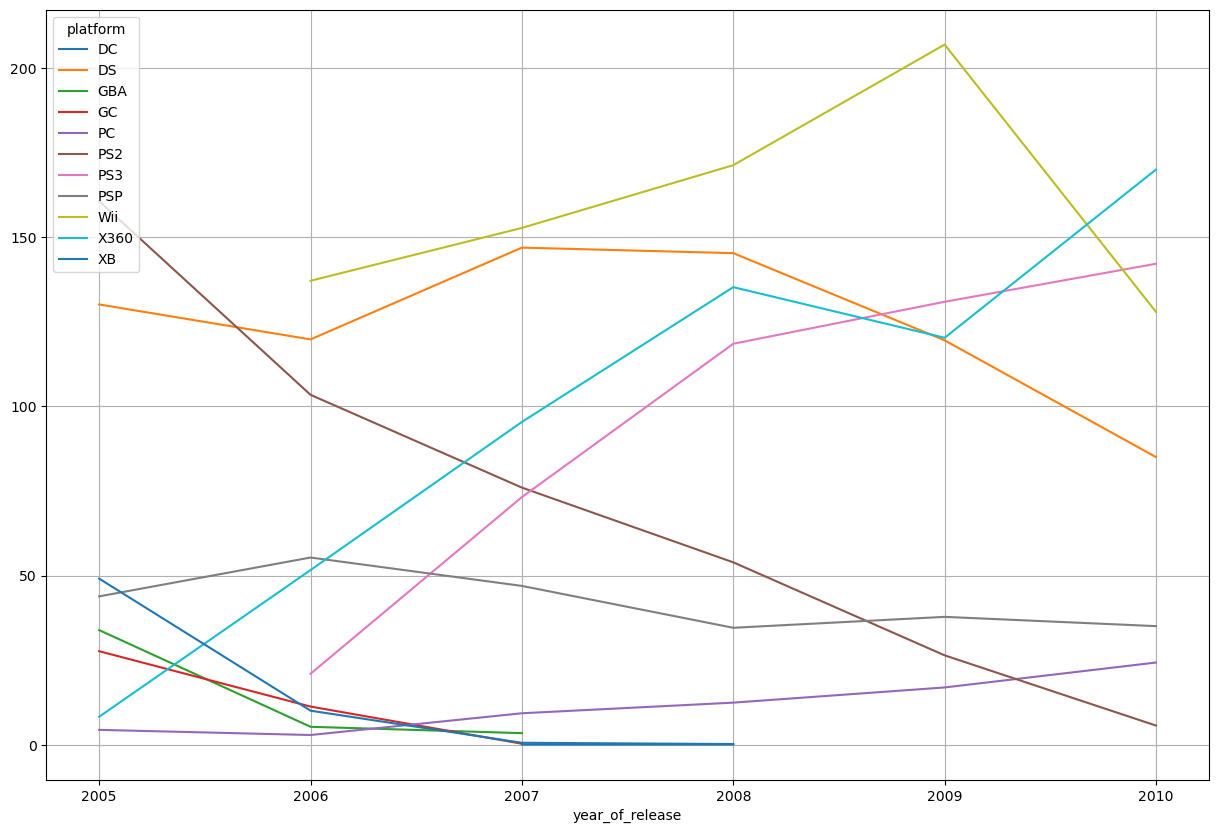

In [23]:
# Для анализа данных лучше всего взять промежуток 2005 - 2010, 
# т.к. этот период, судя по графику, является бурным ростом кол-во игр
# Также появление новых приставок и других перифейных устройств, платформ

data_2005_for_2010 = data[(data['year_of_release'] >= 2005) & (data['year_of_release'] <= 2010)]
data_2005_for_2010.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum').plot(grid=True, figsize=(15, 10))

Здесь видно, что из рынка устройств по играм вышли платформы: GBA, DC, GC

А появились: PS3, Wii, X360

Характерный срок составляет 1 год

Одновременно появились платформы: PS3 и Wii

In [24]:
# Теперь рассмотрим платформ, выпущенных 2015 - 2016, чтобы взять данные за актуальные периоды на 2017

data_2015_for_2016 = data[(data['year_of_release'] >= 2015) & (data['year_of_release'] <= 2016)]
data_2015_for_2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71,7.5,NaN,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,71,7.5,NaN,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,71,7.5,NaN,7.39


<AxesSubplot:xlabel='year_of_release'>

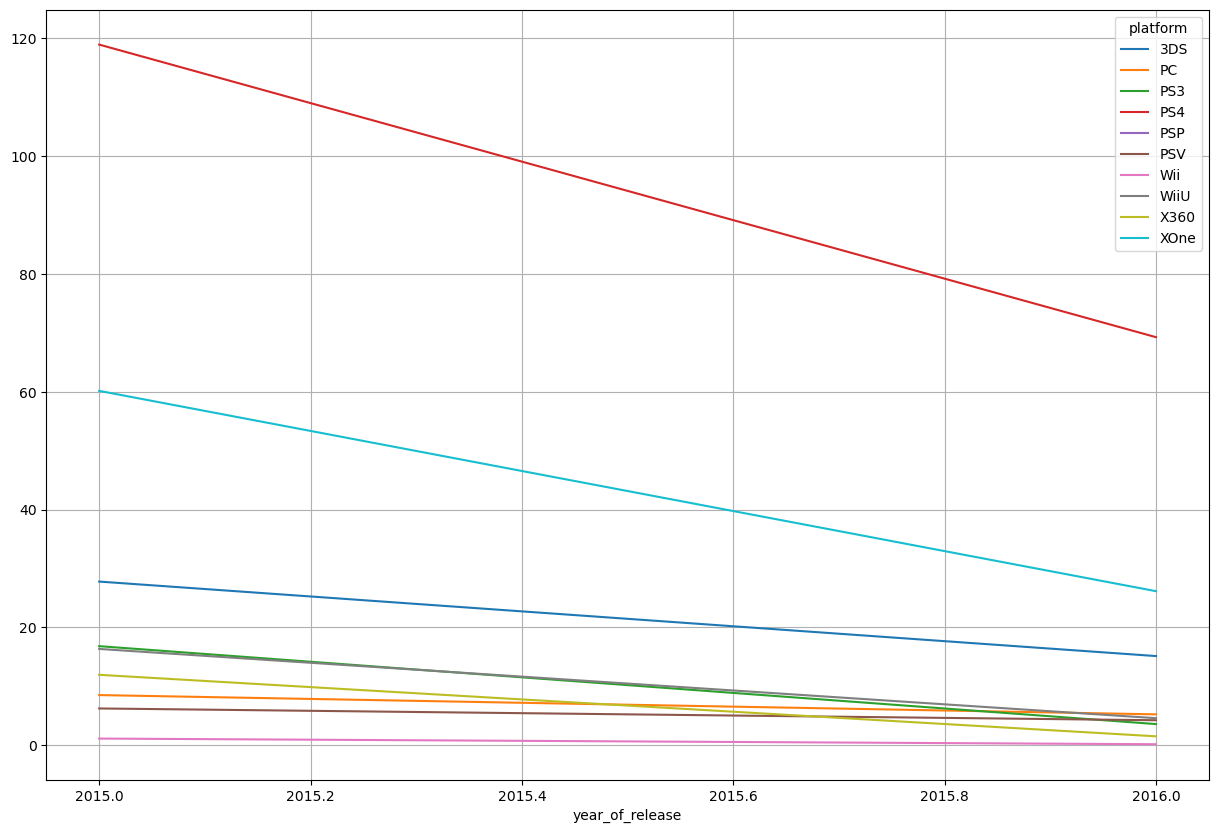

In [25]:
data_2015_for_2016.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum').plot(grid=True, figsize=(15, 10))

Здесь можно заметить, что все игровые приставки и устройства идут в убытки. 

Стабильно держатся это Wii, PC, WiiU, но претерпевают малое количество убытки

In [26]:
# Платформа, имеюищаяся огромные копии за продажи
data_2015_for_2016.pivot_table(index = ['platform'], values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales'], aggfunc = 'sum').sort_values(by = 'sum_sales', ascending = False)

,eu_sales,jp_sales,na_sales,other_sales,sum_sales
platform,,,,,
PS4,83.54,12.05,63.86,28.70,188.15
XOne,28.10,0.18,50.30,7.71,86.29
3DS,7.39,23.55,10.31,1.67,42.92
WiiU,6.49,4.12,8.86,1.48,20.95
PS3,7.30,4.97,5.66,2.49,20.42
PC,9.10,0.00,3.72,0.95,13.77
X360,4.21,0.00,8.05,1.22,13.48
PSV,1.08,8.41,0.54,0.47,10.50
Wii,0.73,0.00,0.49,0.10,1.32


Приставки, имеющие огромные копии за продажи: PS4, XOne, 3DS, WiiU, PS3

In [27]:
data_2015_for_2016 = data_2015_for_2016.query("platform == ['PS4', 'XOne', '3DS', 'WiiU', 'PS3']")

<AxesSubplot:xlabel='year_of_release'>

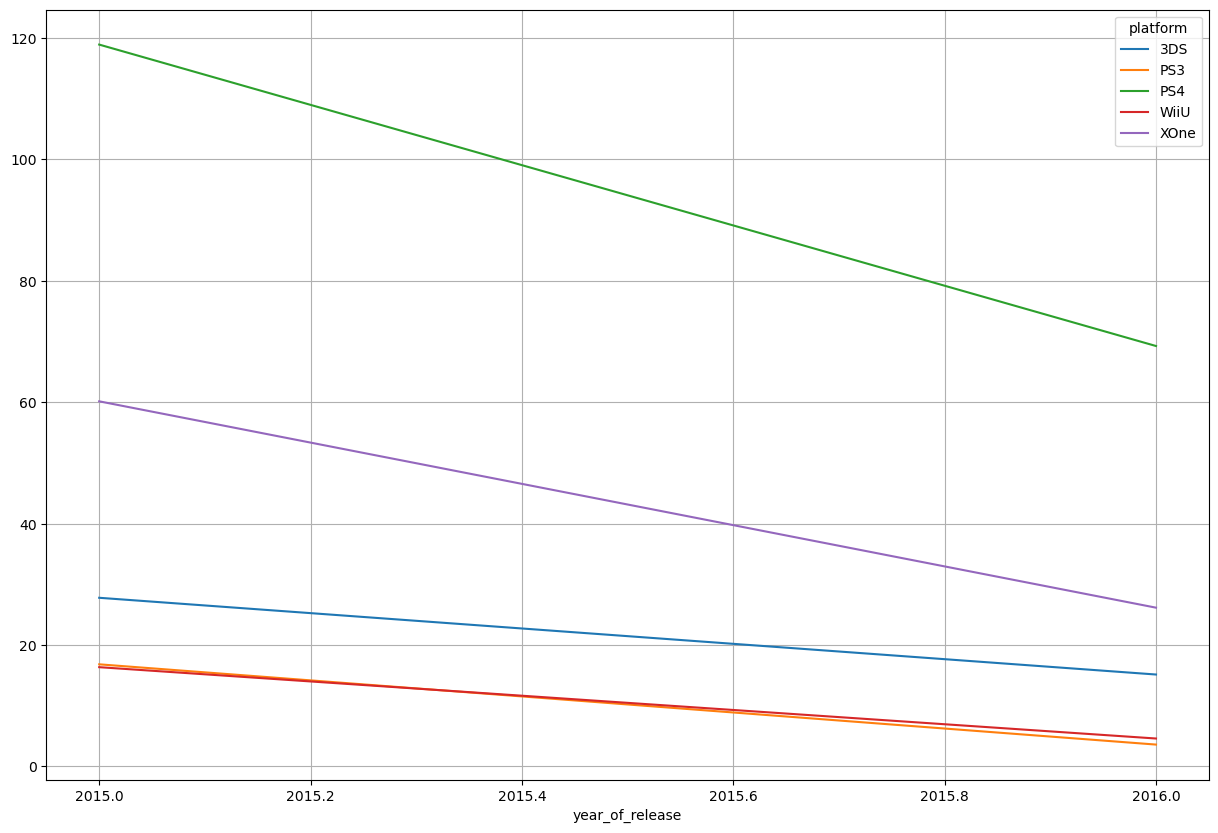

In [28]:
data_2015_for_2016.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum').plot(grid=True, figsize=(15, 10))

Платформы, лидирующие по продажам: PS4 и XOne

Здесь видно, что вниз уходит сильнее всего это платформа: PS4. Второе место после нее занимает XOne

Более менее стабильно держатся платформа: PS3, WiiU, но все равно идет вниз

Потенциальным прибыльным можно считать платформу: PS4 и XOne, не смотря на то, что идет в убытку, они имеют достаточные внушительные суммарные копии

In [29]:
# Построим график ящик с усами по глобальным продажам игр в разбивке по платформам
data_2015_for_2016.groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,132.0,0.325152,0.798620,0.01,0.030,0.090,0.2325,7.14
PS3,111.0,0.183964,0.342696,0.01,0.020,0.060,0.1600,2.70
PS4,301.0,0.625083,1.457063,0.01,0.050,0.120,0.4200,14.63
WiiU,42.0,0.498810,0.850240,0.01,0.050,0.215,0.5175,4.44
XOne,167.0,0.516707,0.965940,0.01,0.035,0.130,0.5550,7.39


<AxesSubplot:title={'center':'sum_sales'}, xlabel='platform'>

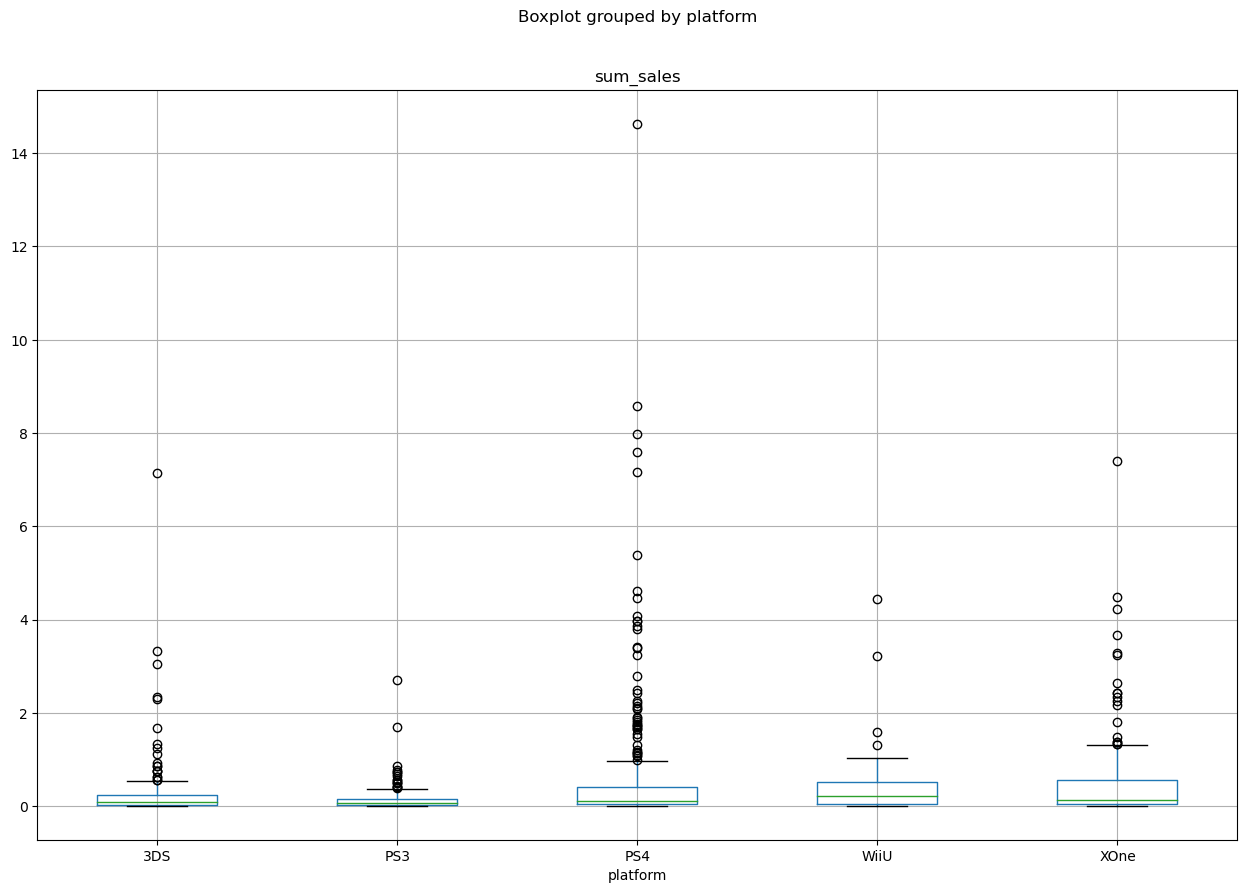

In [30]:
# Построим общую диаграмму размаха
data_2015_for_2016.boxplot(column='sum_sales', by='platform', figsize=(15, 10))

Здесь можно заметить, что существуют большие выбросы у платформ. 

Но есть один выброс платформы PS4, который по сравнению с остальными сильнее всего - свыше 14 млн копий.

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

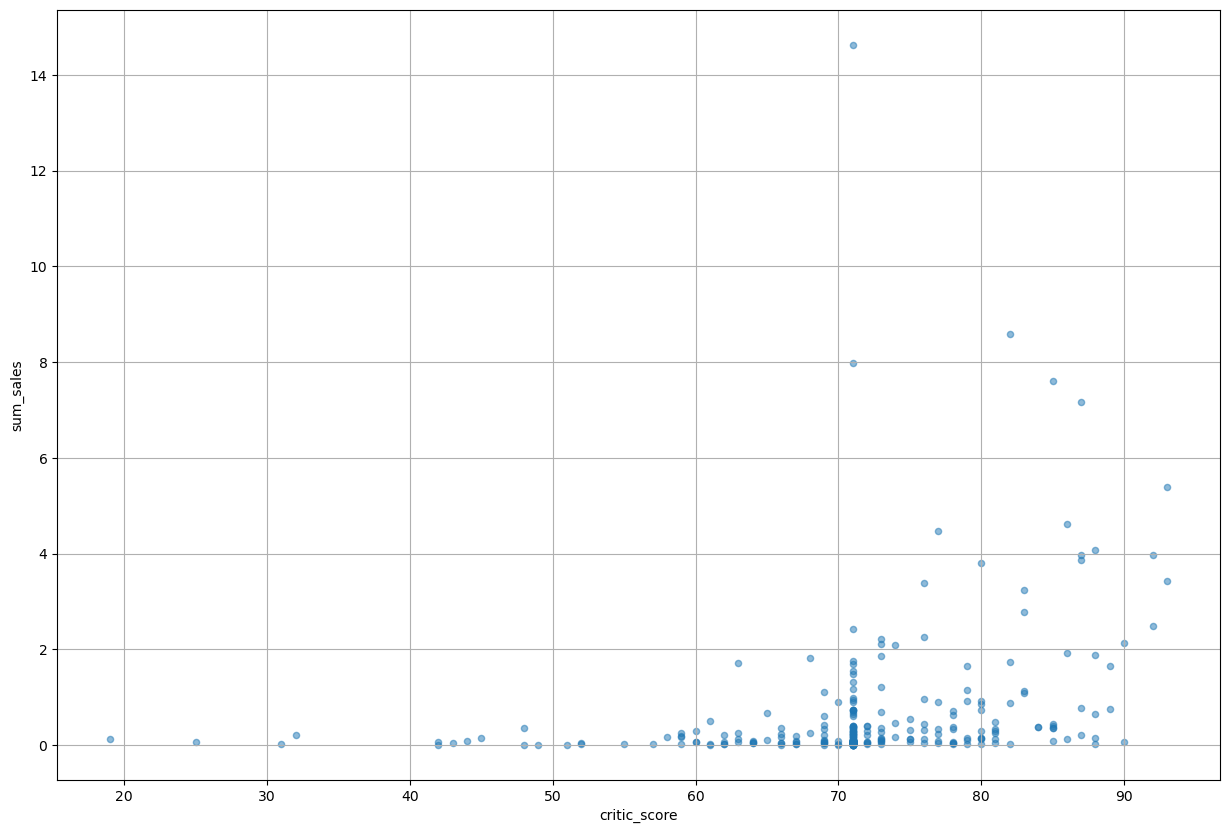

In [31]:
# Наблюдаем влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков
# Построим диаграмму рассеяния

# Оценки критиков
data_2015_for_2016[data_2015_for_2016['platform'] == 'PS4'].plot(x = 'critic_score', y = 'sum_sales', kind = 'scatter', alpha = 0.5, figsize=(15,10), grid = True)

<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

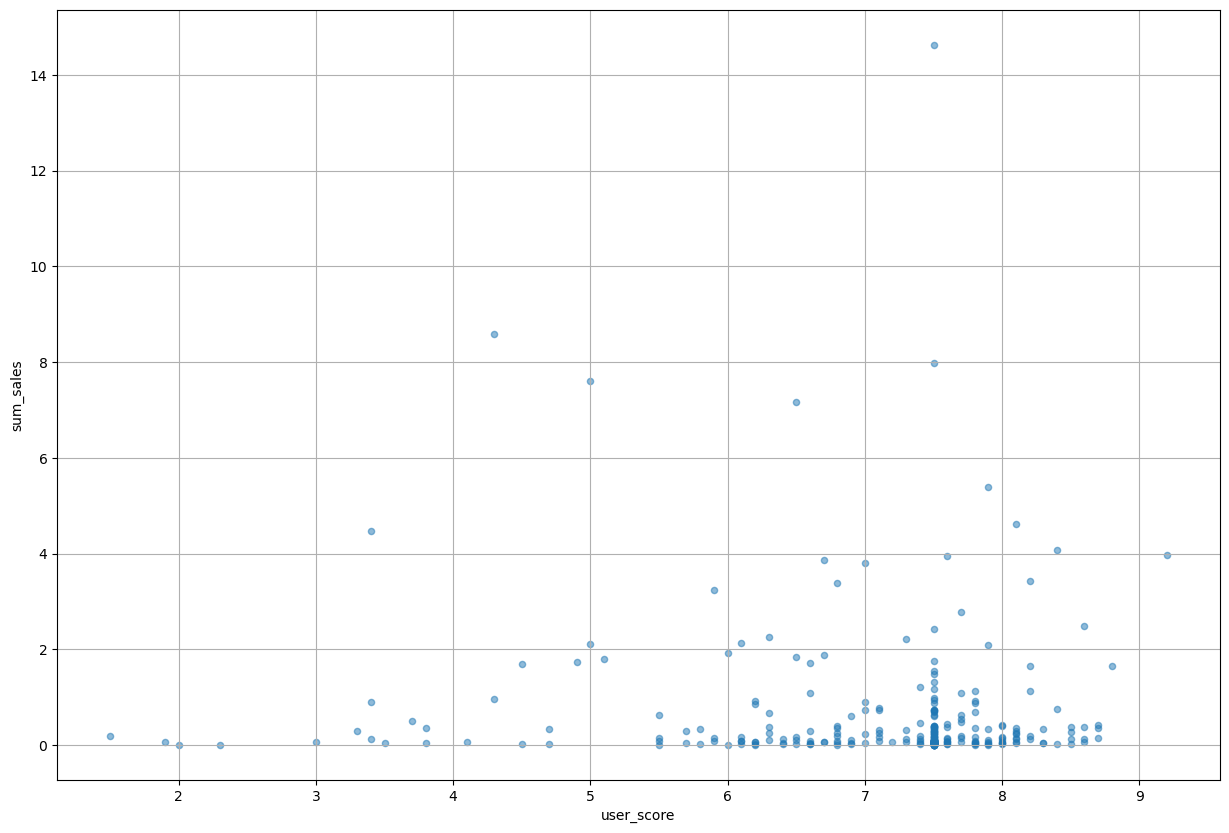

In [32]:
# Оценки пользователей
data_2015_for_2016[data_2015_for_2016['platform'] == 'PS4'].plot(x = 'user_score', y = 'sum_sales', kind = 'scatter', alpha = 0.5, figsize=(15,10), grid = True)

In [33]:
# Посчитаем корреляцию между отзывами и продажами
data_2015_for_2016_ps4 = data_2015_for_2016[data_2015_for_2016['platform']=='PS4']
data_2015_for_2016_ps4_correlation_user_score = data_2015_for_2016_ps4['user_score'].corr(data_2015_for_2016_ps4['sum_sales'])
display(f'Корреляция слабо отрицательная: {data_2015_for_2016_ps4_correlation_user_score}')

'Корреляция слабо отрицательная: -0.06756414009780895'

In [34]:
data_2015_for_2016_ps4_correlation_critic_score = data_2015_for_2016_ps4['critic_score'].astype(float).corr(data_2015_for_2016_ps4['sum_sales'])
print(f'Корреляция слабо положительная: {data_2015_for_2016_ps4_correlation_critic_score}')

Корреляция слабо положительная: 0.29511266006874376


Можно сделать вывод, что большая часть продажи копией зависит от наличия высоких оценок 

In [35]:
# Применим описательную статистку и рассмотреть через нее продажи игр других платформ
data.groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,133.0,0.729173,0.917799,0.07,0.3000,0.460,0.7800,7.81
3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
3DS,520.0,0.498077,1.430876,0.01,0.0500,0.120,0.3300,14.60
DC,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
DS,2151.0,0.374765,1.426451,0.01,0.0500,0.110,0.2700,29.80
GB,98.0,2.606735,5.365478,0.06,0.3025,1.165,2.1650,31.38
GBA,822.0,0.386679,0.896897,0.01,0.0525,0.160,0.3900,15.84
GC,556.0,0.357788,0.686346,0.01,0.0600,0.150,0.3525,7.06
GEN,27.0,1.050000,1.490041,0.03,0.0700,0.150,1.7050,6.02


Здесь видно, что у платформы Wii максимальное отклонение составляет 82.54, проверим на графике диаграмм

In [36]:
# Подключаем библиотеку matplotlib.pyplot для корректировки визуализации
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'sum_sales'}, xlabel='platform'>

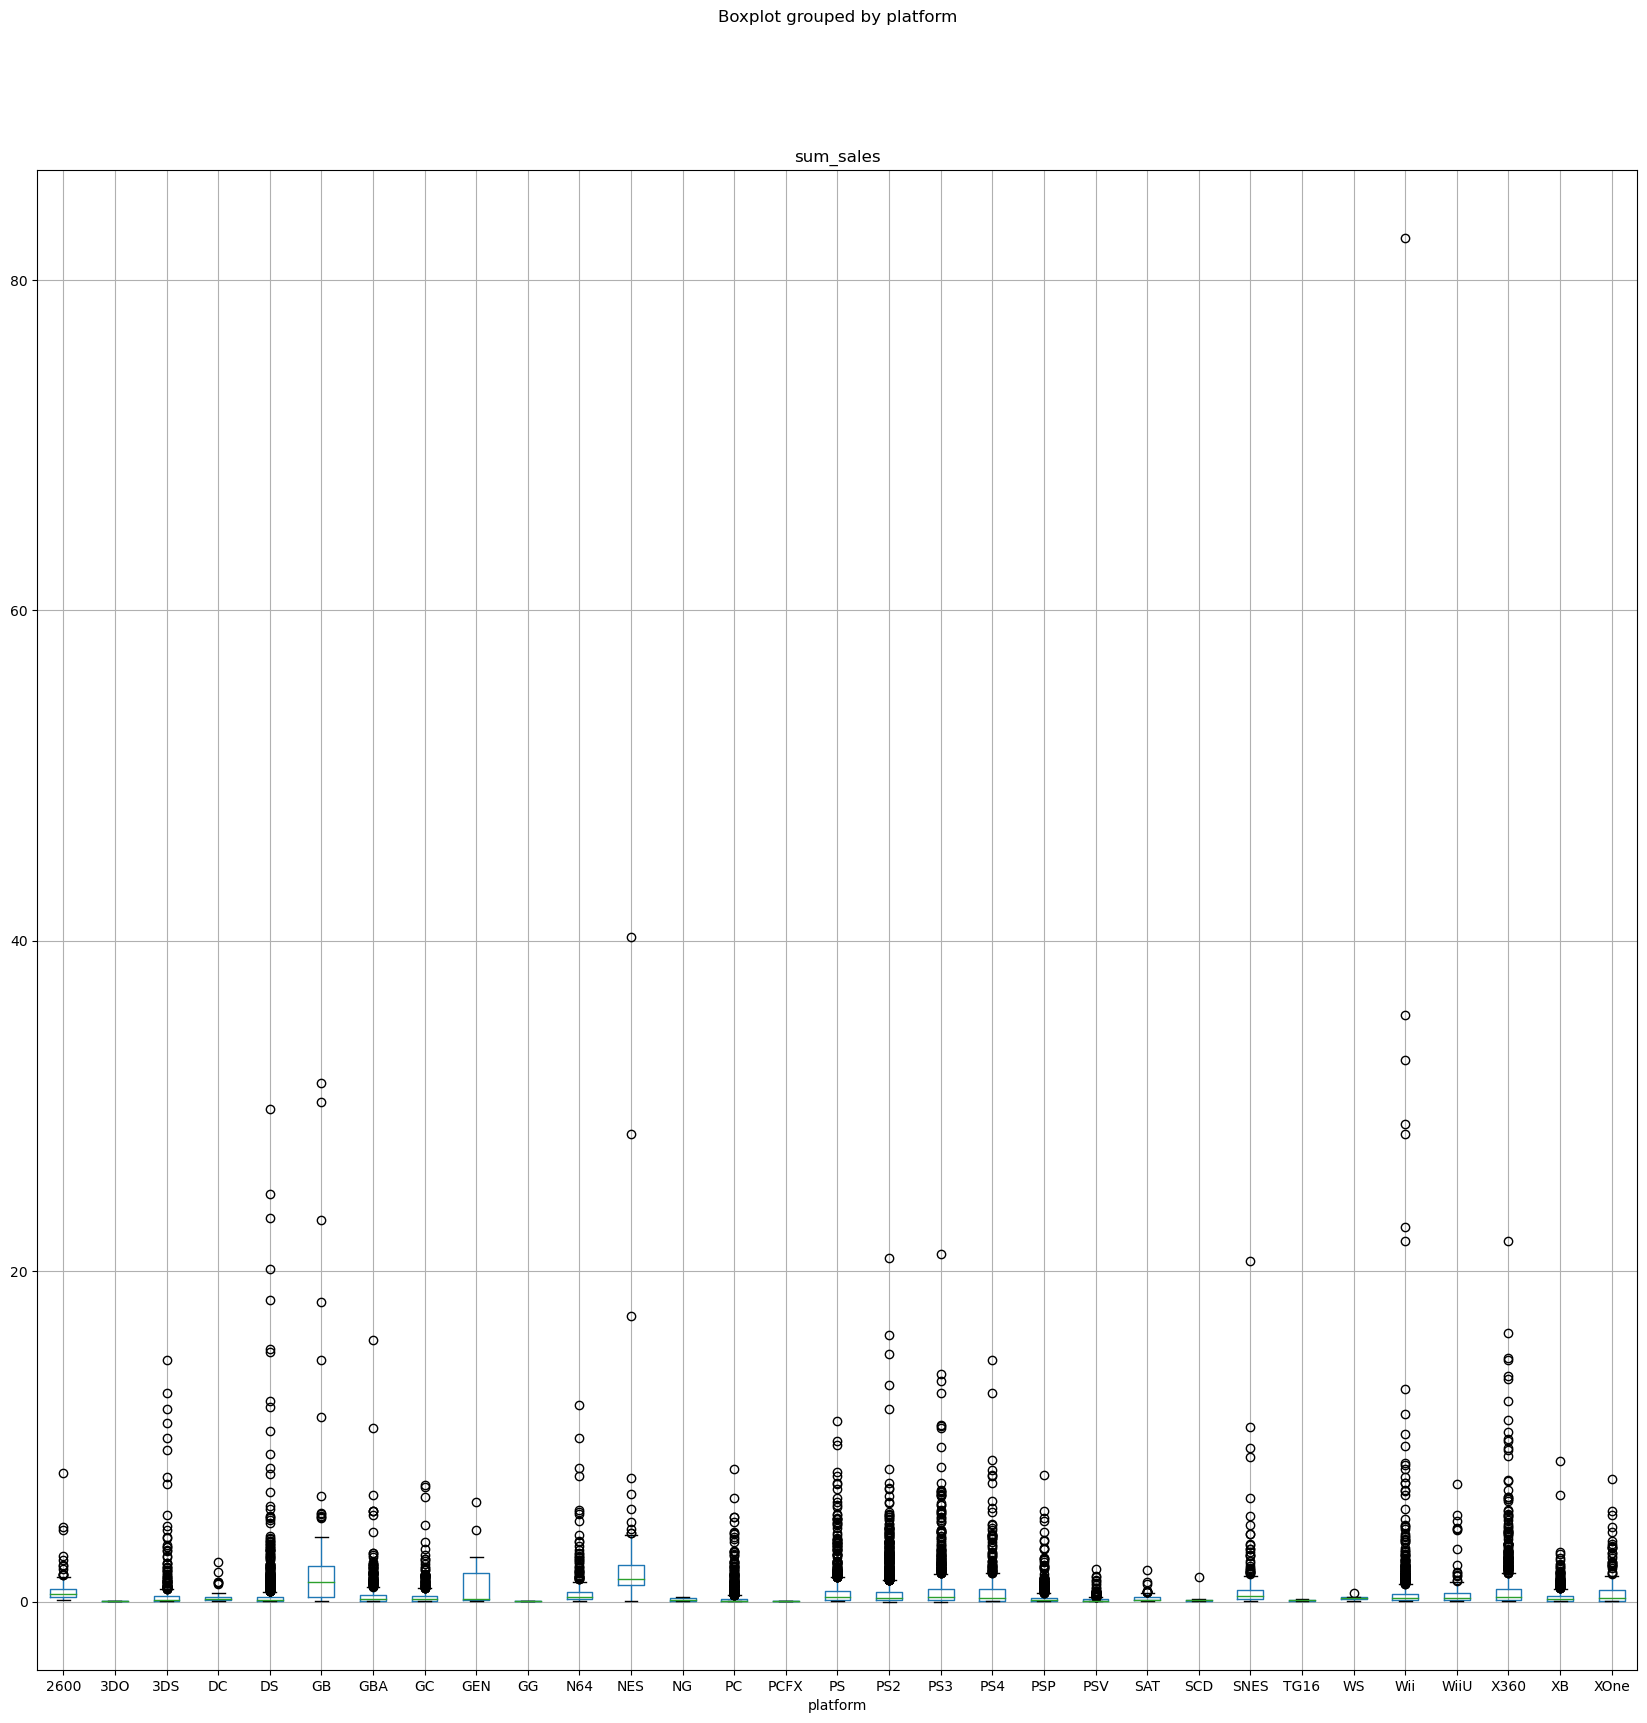

In [37]:
# Изображаем диаграмму размаха
data.boxplot(column='sum_sales', by='platform', figsize=(20,20))

Здесь видно много выбросов от 20 млн, а от 10 млн незначительные, но попробуем ограничиться поиском до 2,5 млн копией

(0.0, 2.5)

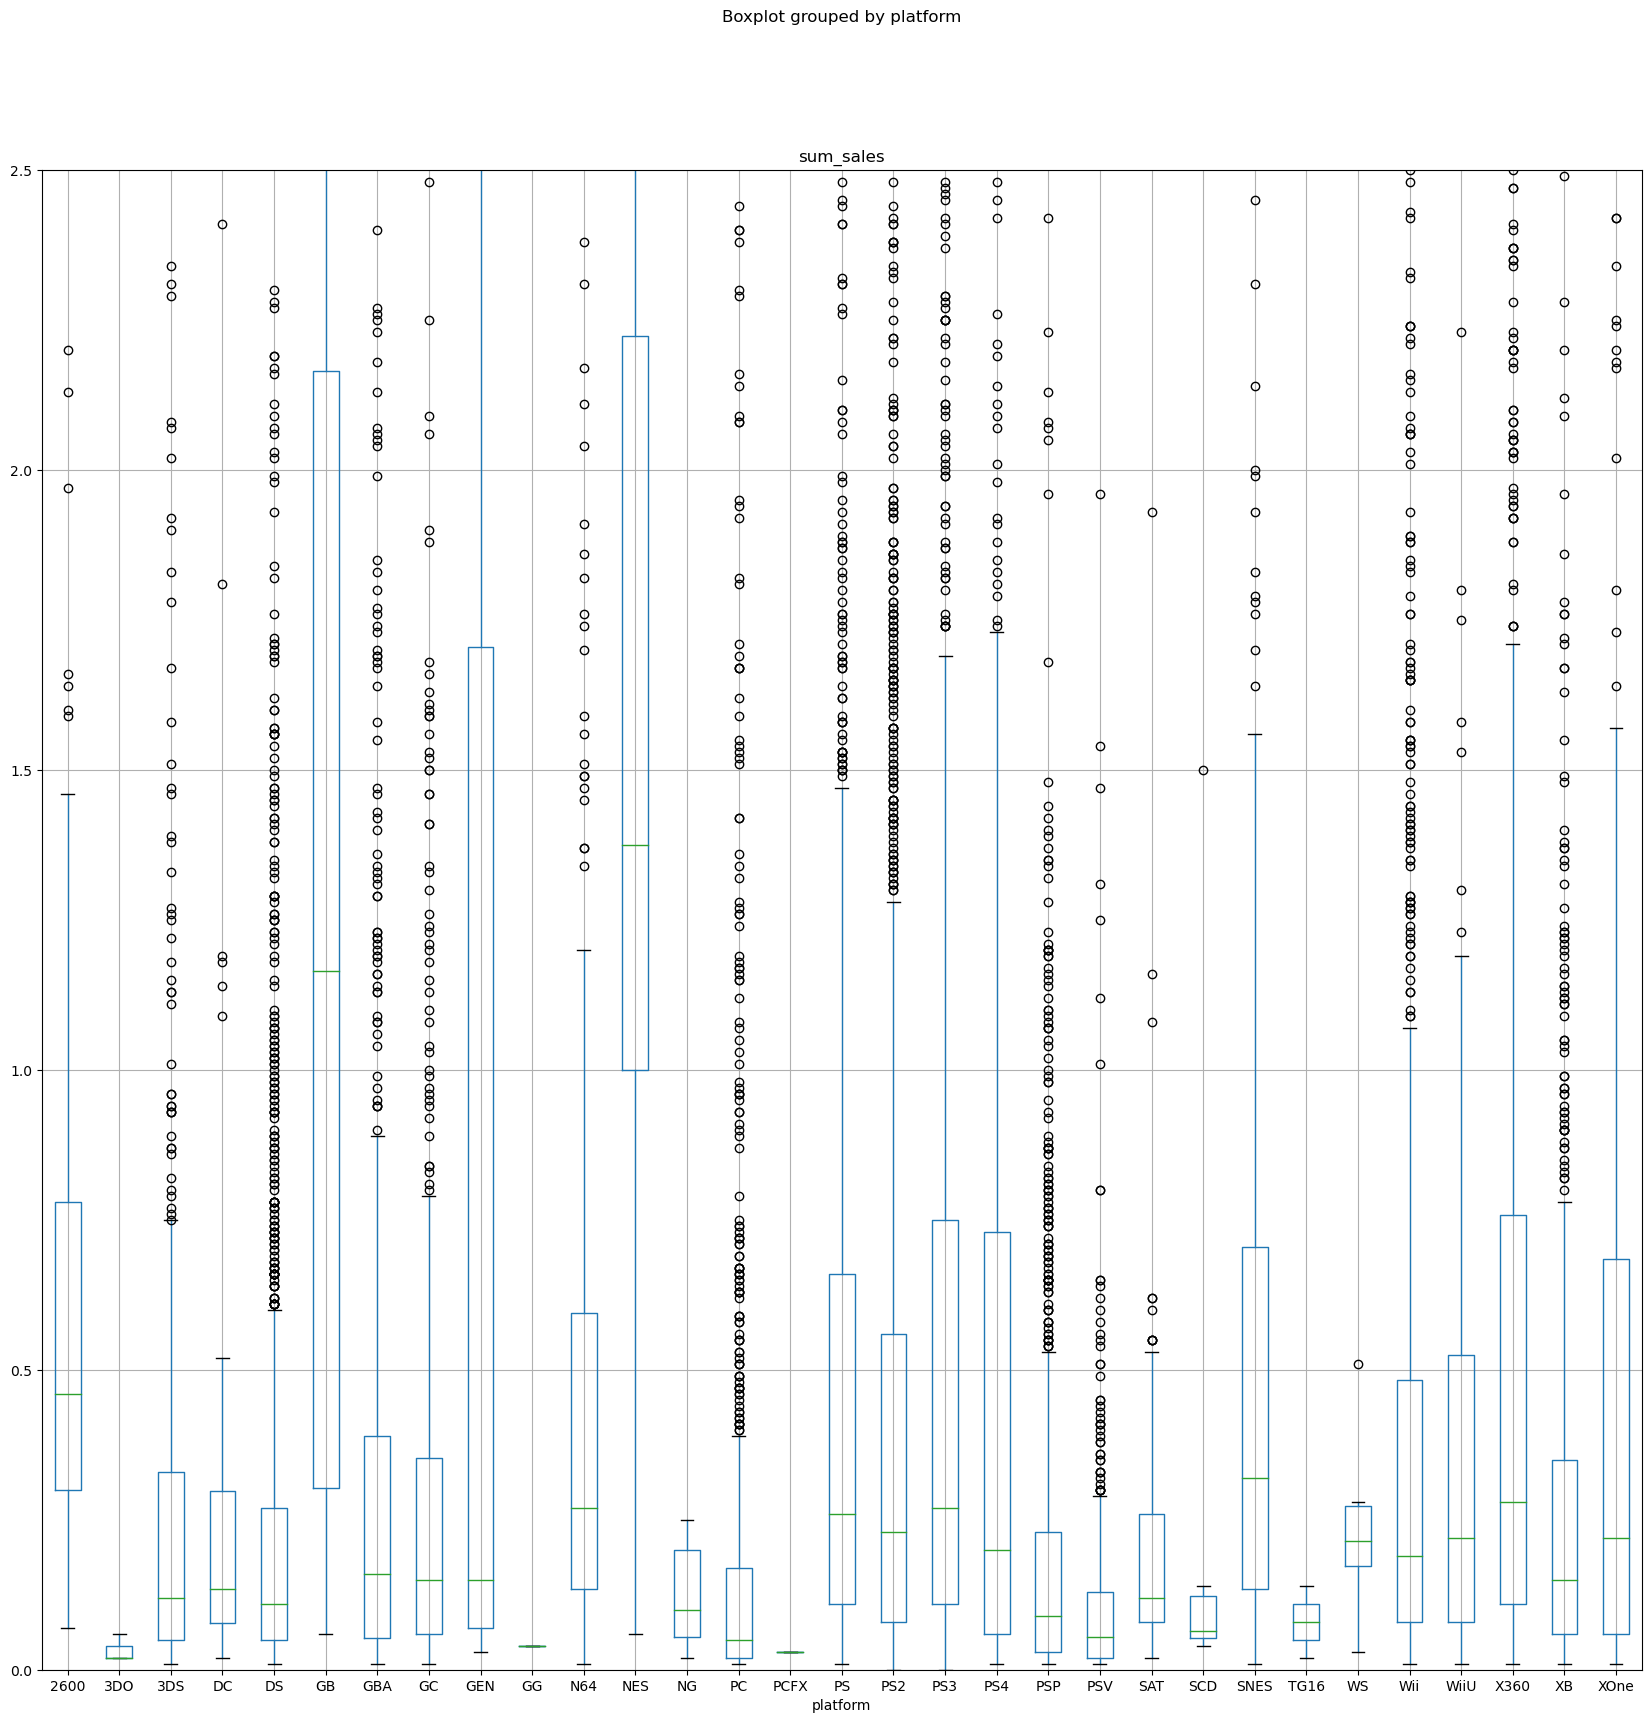

In [38]:
# Изображаем диаграмму размаха с ограниченным интервалом до 20 млн
data.boxplot(column='sum_sales', by='platform', figsize=(20,20))
plt.ylim(0, 2.5)

Если условно будем пренебрегать эти выбросы, то платформы игр: GB, GEN, NES больше всего имеют копии игр по всему миру по сравнению остальных платформ

Однако есть платформа, которая недавно вышла на рынок и быстро получила популярность, что и из-за нее образовались выбросы на графиках. Эту платформу можно считать: Wii

Рассмотрим общее распределение игр по жанрам

<AxesSubplot:title={'center':'Список жанров, приобретевших популярность'}, ylabel='genre'>

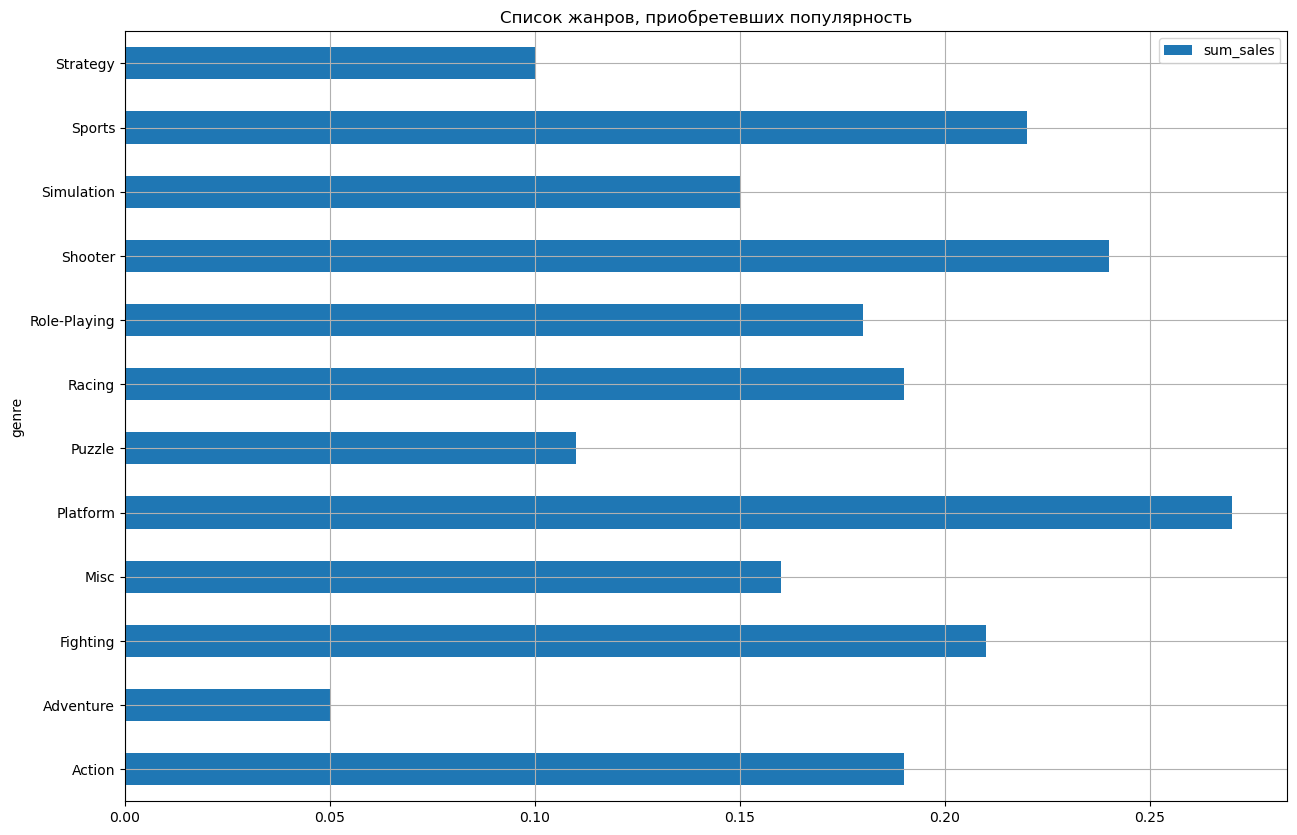

In [39]:
# Здесь рассмотрим общее распределение игр по жанрам медианным значением, 
# т.к. мы уже выше рассмотрели, что существуют выбросы
data.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'median').plot(
                                                                                kind = 'barh',
                                                                                title = 'Список жанров, приобретевших популярность',
                                                                                grid = True,
                                                                                figsize = (15, 10))

Здесь можно заметить, что есть хиты по продажам: Platform, Shooter и Sports (Самые прибыльные)

Но также не уступают их по месту: Action и Fighting

Список жанров, которые мало получили популярность: Adventure, Puzzle, Strategy (Самые убыльные)

Более мене популярностью занимают: Simulation и Misc

Шаг 4. Составьте портрет пользователя каждого региона

Рассмотрим и опишем портрет пользователей региона Северной Америки (NA)

<AxesSubplot:title={'center':'Популярные платформы на Северной Америке'}, ylabel='platform'>

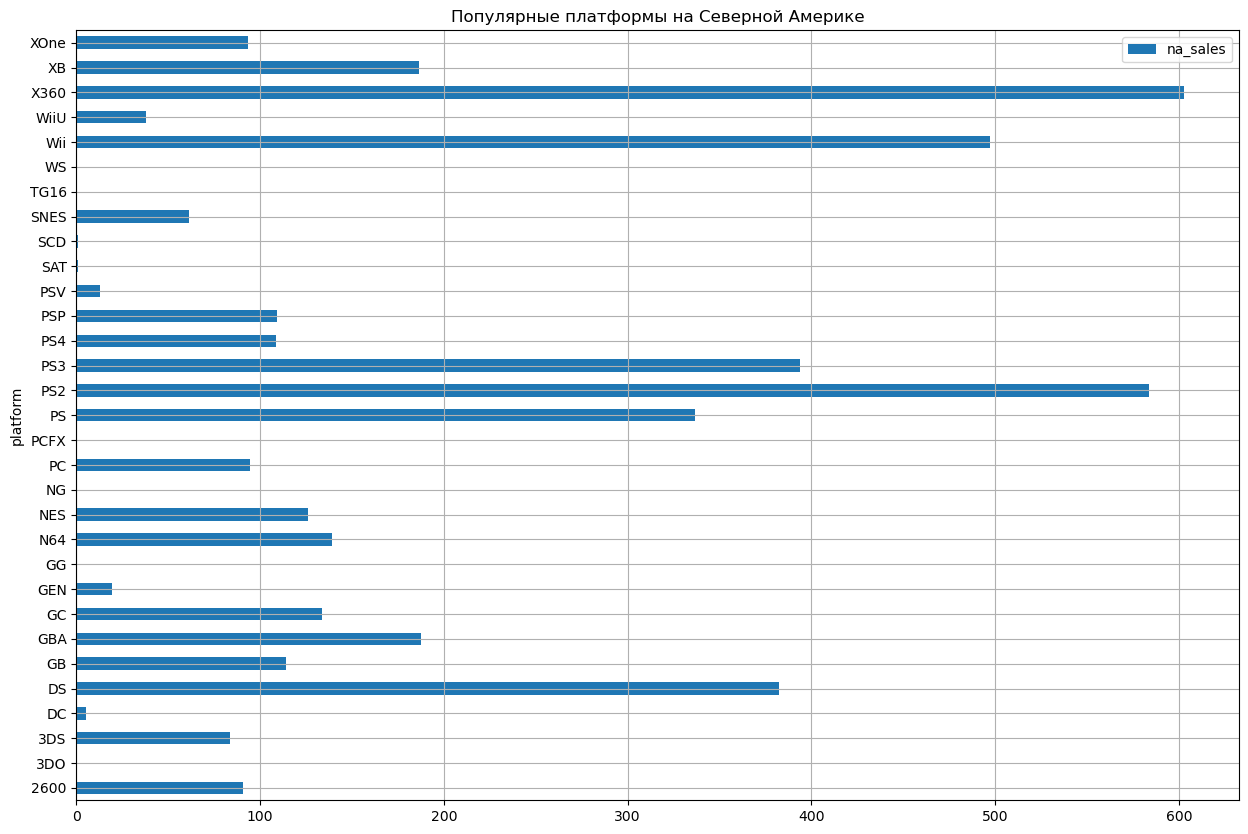

In [40]:
data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').plot(
                                                                                kind = 'barh',
                                                                                title = 'Популярные платформы на Северной Америке',
                                                                                grid = True,
                                                                                figsize = (15, 10))

Американцы предпочитают больше всего играть на платформе: X360, PS2, Wii, PS3 и DS

Поскольку нам известно, что платформа X360 является американской, а PS2, Wii, PS3 и DS - японские, но большинство люди пользуются этими

А меньше всего - WiiU, SNES, PSV, GEN и DC

Теперь рассмотрим предпочитаемые жанры в Северной Америке

<AxesSubplot:title={'center':'Популярные платформы на Северной Америке'}, ylabel='genre'>

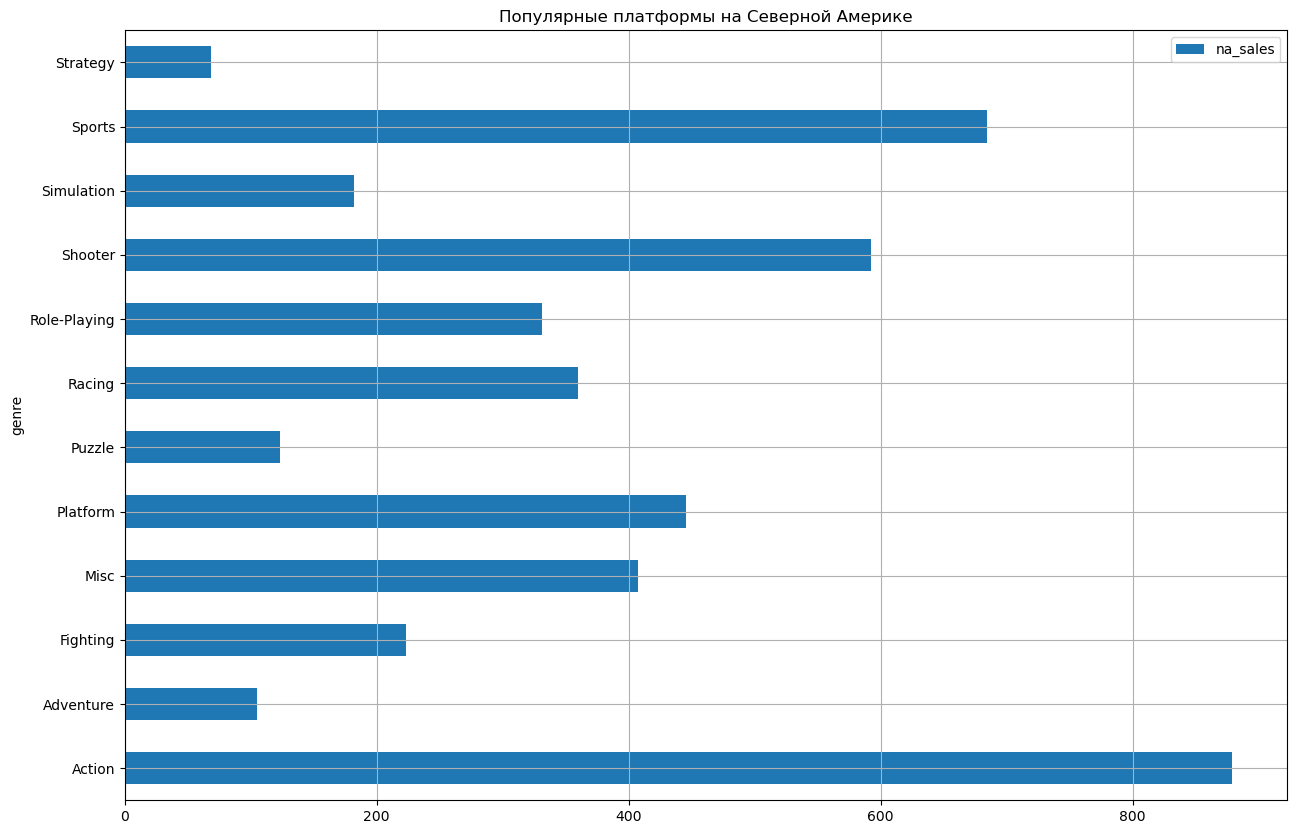

In [41]:
data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').plot(
                                                                                kind = 'barh',
                                                                                title = 'Популярные платформы на Северной Америке',
                                                                                grid = True,
                                                                                figsize = (15, 10))

Американцы предпочитают больше всего играть на жанрах: Action, Sports, Shooter, Platform и Misc

А меньше всего - Strategy, Adventure, Puzzle, Simulation и Fighting

Рассмотрим теперь рейтинг ESRB на продажи в регионе Северной Америке

<AxesSubplot:title={'center':'Рейтинги в Северной Америке'}, ylabel='rating'>

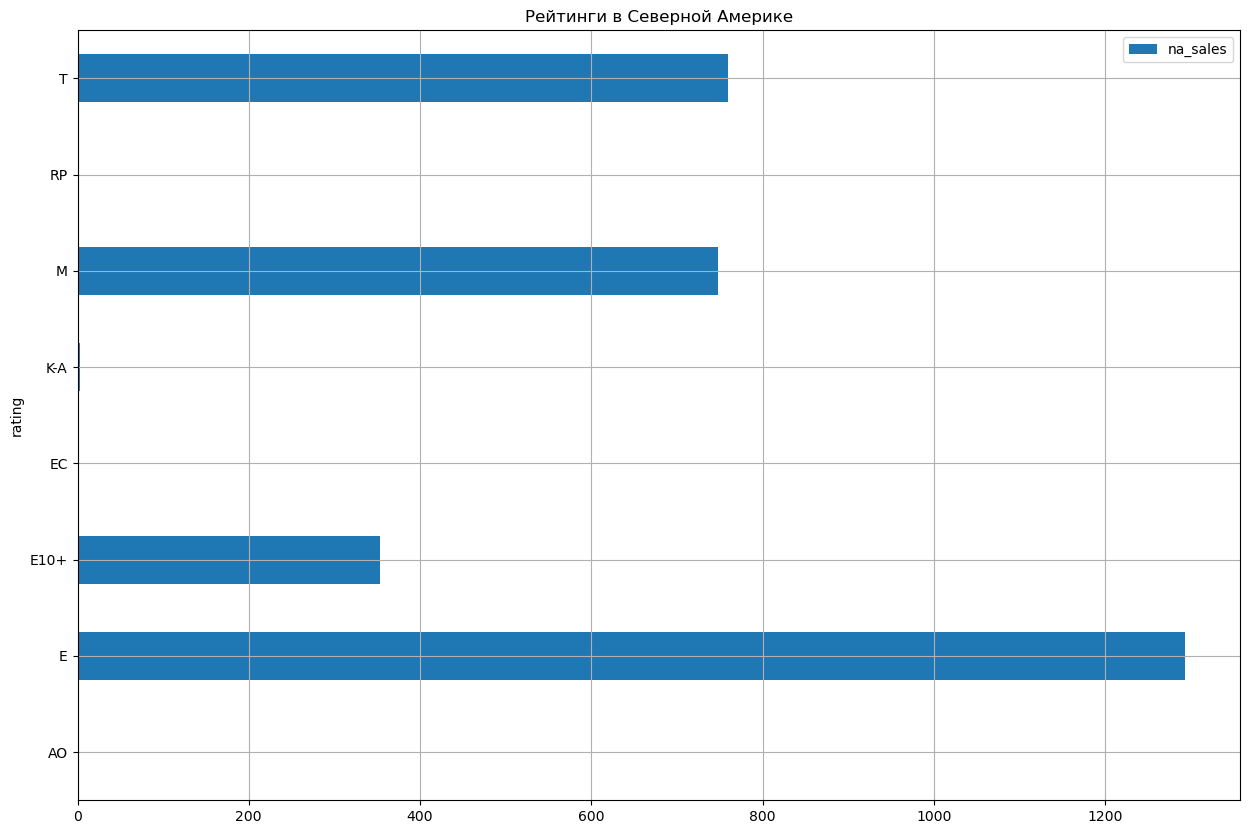

In [42]:
data.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').plot(
                                                                                kind = 'barh',
                                                                                title = 'Рейтинги в Северной Америке',
                                                                                grid = True,
                                                                                figsize = (15, 10))

Здесь получается, что американцы больше всего играют в играх, у которых рейтинг E (возраст от 5 лет). Но приближенное одинаковое место занимают рейтинги: T (старше 13 лет) и M (старше 16 лет)

Можно сделать вывод, что здесь большинство американцы в возрасте около или старше 6 (в большинствах случаях) лет играют в основном на платформах X360, PS2, Wii, PS3 и DS в жанрах Action, Sports, Shooter, Platform и Misc

Рассмотрим и опишем портрет пользователей Европейского региона (EU)

<AxesSubplot:title={'center':'Популярные платформы в Европе'}, ylabel='platform'>

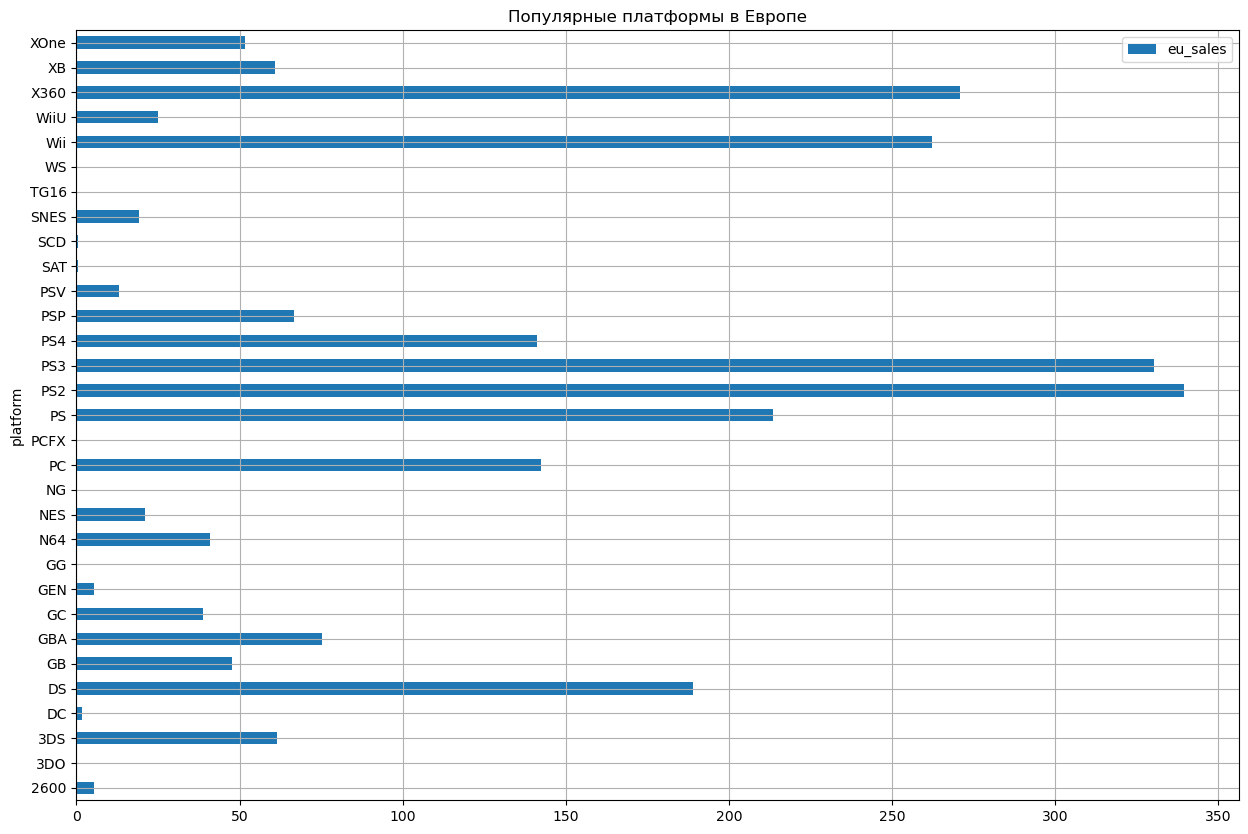

In [43]:
data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').plot(
                                                                                kind = 'barh',
                                                                                title = 'Популярные платформы в Европе',
                                                                                grid = True,
                                                                                figsize = (15, 10))

Европейцы предпочитают больше всего играть на платформе: PS2, PS3, X360, Wii и PS

Видно, что большинство европейцам понравилось японские платформы

А меньше всего - DC, 2600, GEN, PSV и SNES

<AxesSubplot:title={'center':'Популярные жанры в Европе'}, ylabel='genre'>

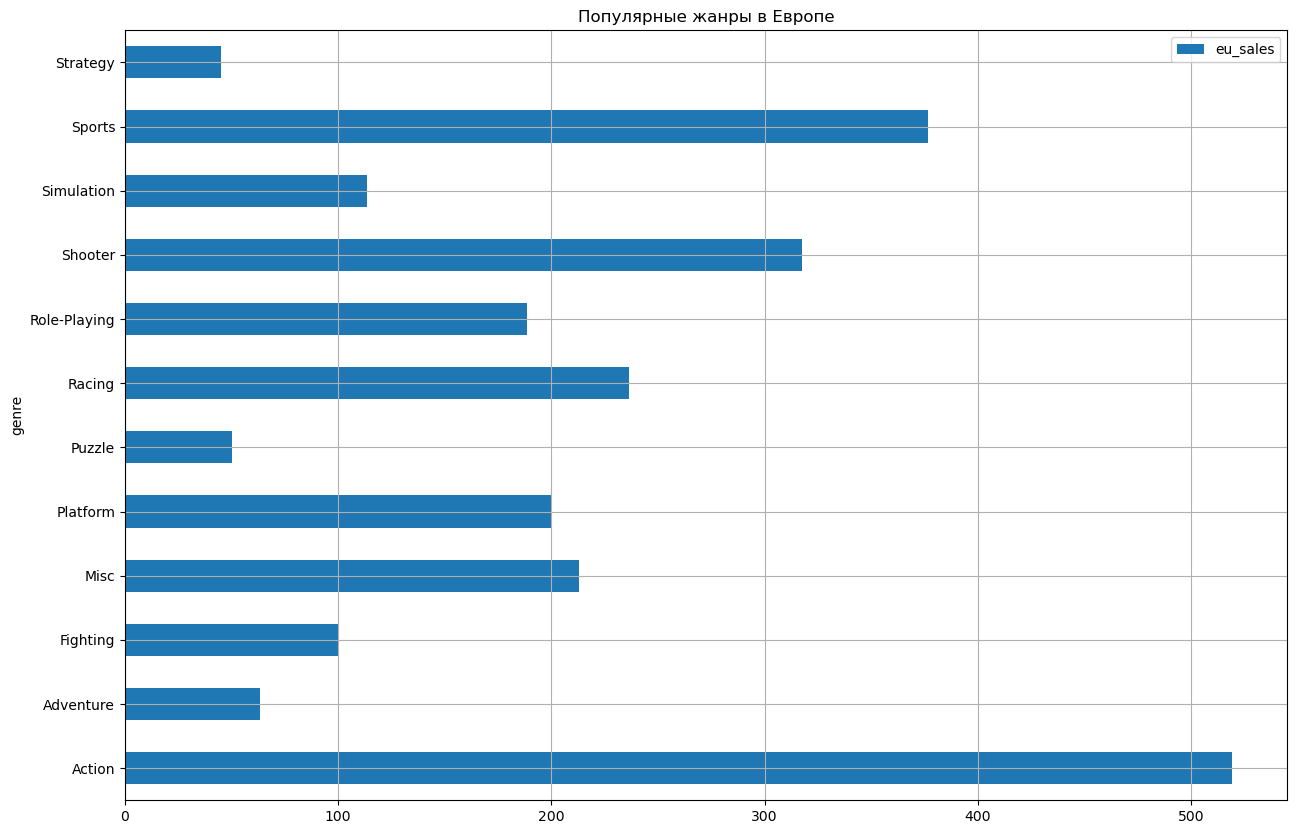

In [44]:
data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').plot(
                                                                                kind = 'barh',
                                                                                title = 'Популярные жанры в Европе',
                                                                                grid = True,
                                                                                figsize = (15, 10))

Европейцы предпочитают больше всего играть на жанрах: Action, Sports, Shooter, Racing и Misc

А меньше всего - Strategy, Puzzle, Adventure, Fighting и Simulation

Вкусы европейского и американского пользователя совпадают в большинствах случаях


Рассмотрим теперь рейтинг ESRB на продажи в регионе Европы

<AxesSubplot:title={'center':'Рейтинги в Европе'}, ylabel='rating'>

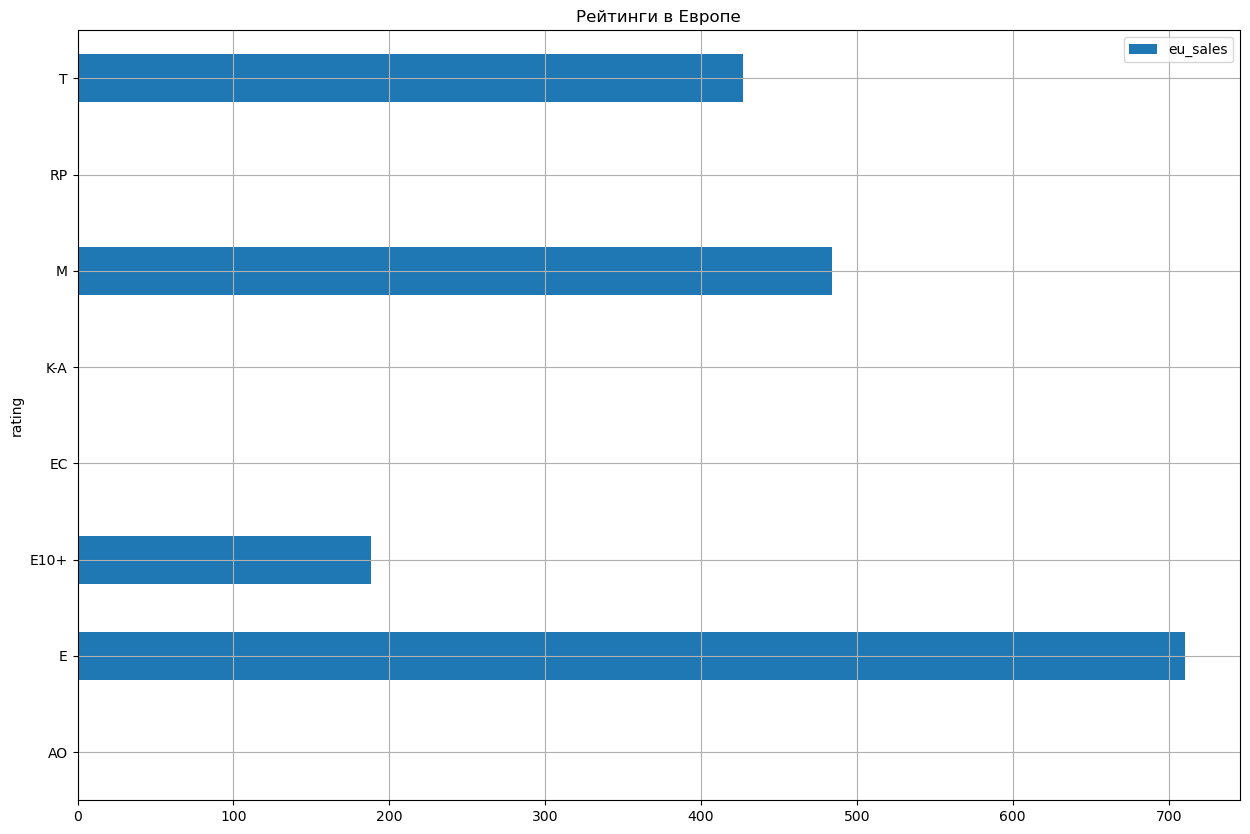

In [45]:
data.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').plot(
                                                                                kind = 'barh',
                                                                                title = 'Рейтинги в Европе',
                                                                                grid = True,
                                                                                figsize = (15, 10))

Здесь получается, что европейцы больше всего играют в играх, у которых рейтинг E (возраст от 5 лет), а второе место - рейтинг T (старше 13 лет), а третье - рейтинг M (старше 16 лет). Малое количество занимает рейтинг E10+ (старше 10 лет) 

Можно сделать вывод, что здесь большинство европейцы совпадают с вкусом и предпочтением американца, но играют в основном на японских платформах

Рассмотрим и опишем портрет пользователей Японского региона (JP)

<AxesSubplot:title={'center':'Популярные платформы в Японии'}, ylabel='platform'>

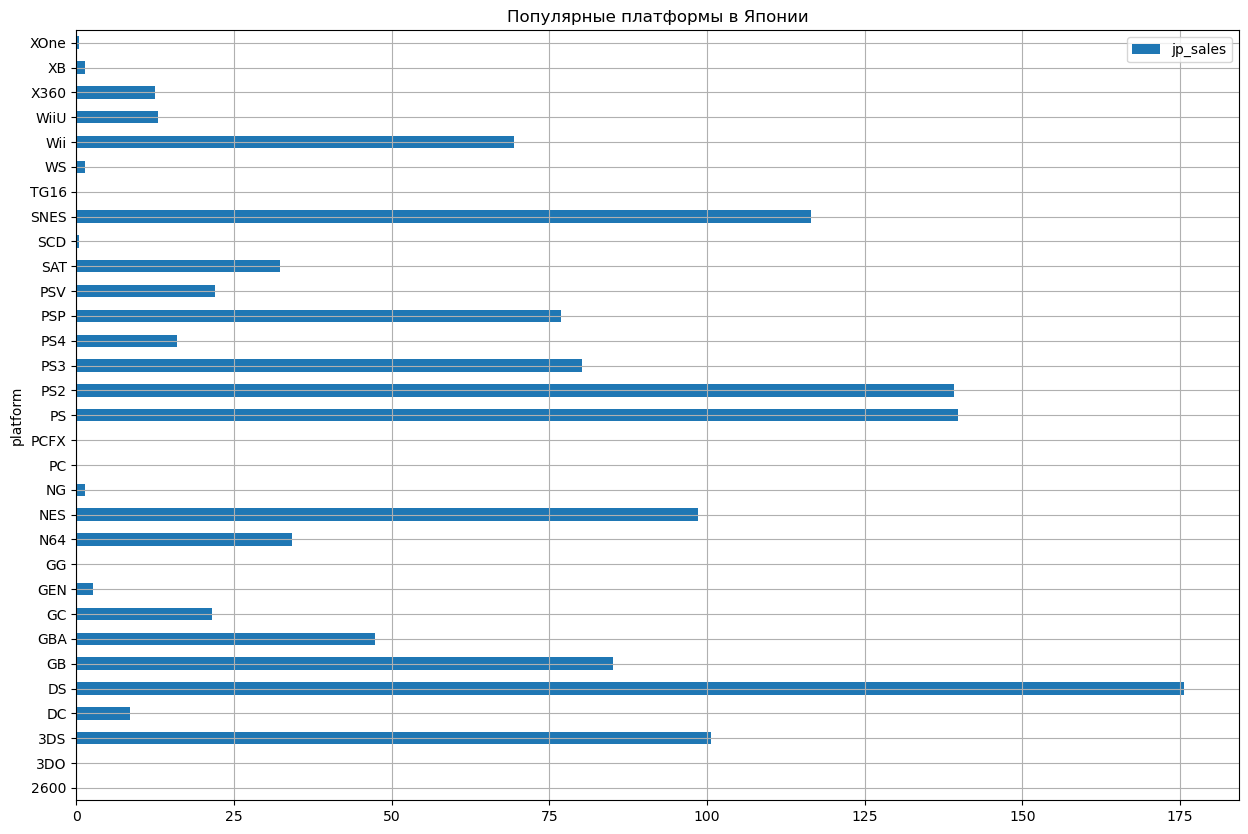

In [46]:
data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').plot(
                                                                                kind = 'barh',
                                                                                title = 'Популярные платформы в Японии',
                                                                                grid = True,
                                                                                figsize = (15, 10))

Японцы предпочитают больше всего играть на платформах: DS, PS, PS2, SNES, 3DS и NES

Очевидно и сразу видно, что большинство японцы пользуются в основном свои японские платформы

А меньше всего - XOne, WB, WS, SCD, NG и GEN

<AxesSubplot:title={'center':'Популярные жанры в Японии'}, ylabel='genre'>

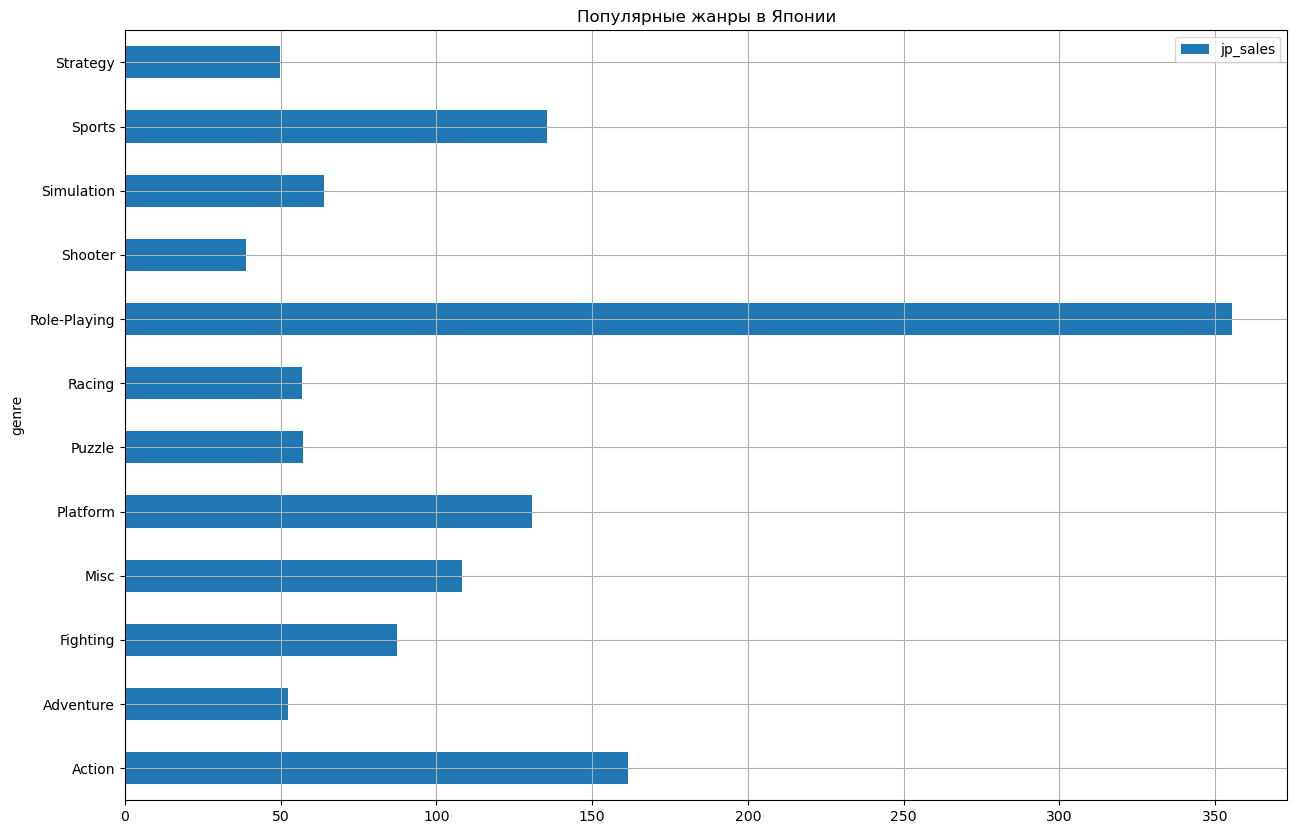

In [47]:
data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').plot(
                                                                                kind = 'barh',
                                                                                title = 'Популярные жанры в Японии',
                                                                                grid = True,
                                                                                figsize = (15, 10))

Японцы предпочитают больше всего играть на жанрах: Role-Playing, Action, Sports, Platform и Misc

А меньше всего - Shooter, Strategy, Adventure, Racing и Puzzle

Вкусы японского пользователя кардинально отличаются от европейских и американских пользователей

<AxesSubplot:title={'center':'Рейтинги в Японии'}, ylabel='rating'>

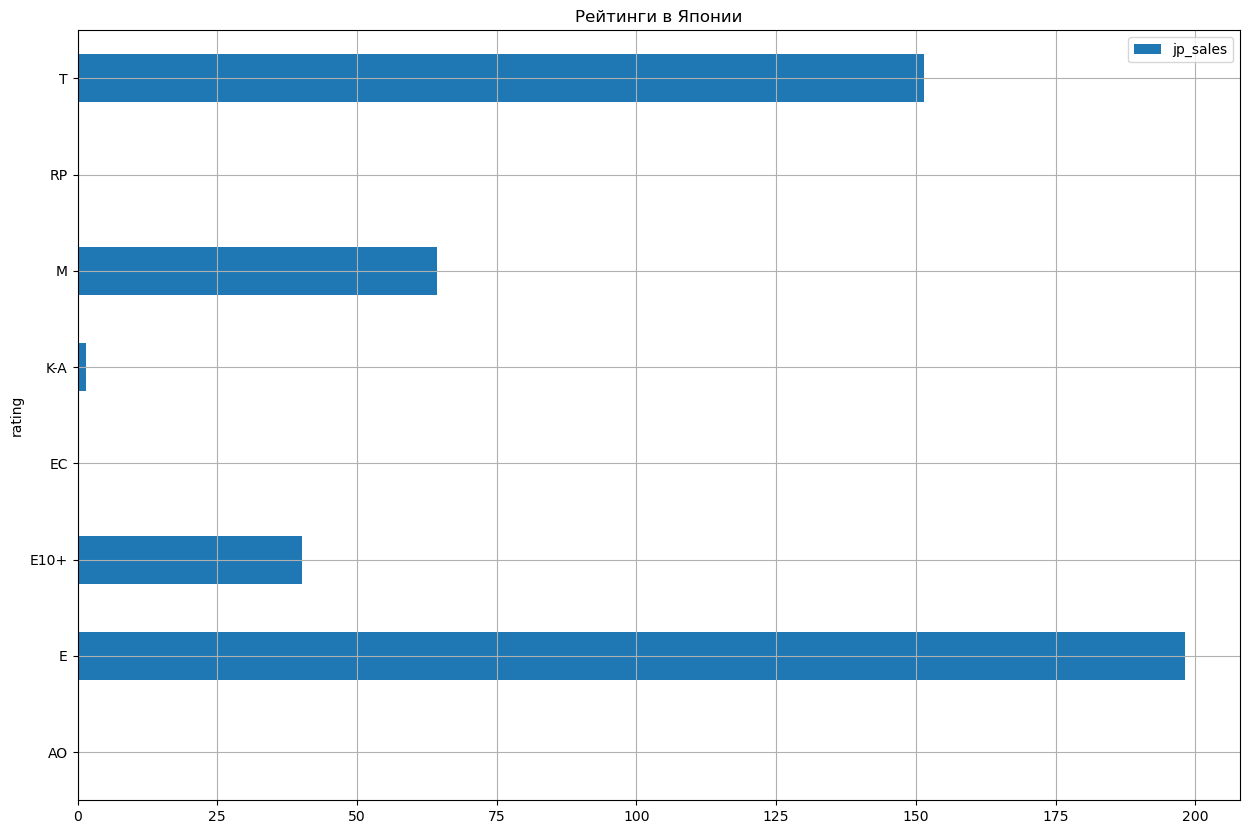

In [48]:
data.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').plot(
                                                                                kind = 'barh',
                                                                                title = 'Рейтинги в Японии',
                                                                                grid = True,
                                                                                figsize = (15, 10))

Здесь получается, что японцы, как и в остальных большинствах случаях, больше всего играют в играх, у которых рейтинг E (возраст от 5 лет), а второе место - рейтинг T (старше 13 лет), количество таких пользователей больше количеств пользователей Северной Америке и Европы, а третье - рейтинг M (старше 16 лет). 
Малое количество занимает рейтинг E10+ (старше 10 лет), 

А устарешвий рейтинг K-A можно рассмотреть как аналог рейтинга Е 

Можно сделать вывод, что здесь большинство юные японцы играют на японских платформах, а их любимые жанры - Role-Playing

Шаг 5. Проверим гипотезы

Одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC?

H0: Средние пользовательские рейтинги платформ одинаковые

H1: Средние пользовательские рейтинги платформ разные

In [123]:
# Сохраняем данные пользователя Xbox One
data_xbox = data[data['platform'] == 'XOne']

# Сохраняем данные пользователя Xbox One
data_pc = data[data['platform'] == 'PC']

# Устанавливаем критический уровень статической значимости
alpha - 0.05

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(data_xbox['user_score'], data_pc['user_score'], equal_var=False)

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


4.964162612622159e-05
Отвергаем нулевую гипотезу


Здесь получилось, что средние пользовательские рейтинги этих платформ разные, т.е. они не связаны между собой

Одинаковы ли средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные?

H0: Средние пользовательские рейтинги жанров одинаковые

H1: Средние пользовательские рейтинги жанров разные

In [125]:
# Сохраняем данные пользовательские рейтинги жанров Action
data_action = data[data['genre'] == 'Action']

# Сохраняем данные пользовательские рейтинги жанров Sports
data_sports = data[data['genre'] == 'Sports']

# Устанавливаем критический уровень статической значимости
alpha - 0.05

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(data_action['user_score'], data_sports['user_score'], equal_var=False)

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


0.7159128316394157
Не получилось отвергнуть нулевую гипотезу


А здесь уже получилось, что средние пользовательские рейтинги этих жанров связаны

Шаг 6. Напишем общий вывод

Если хотим развивать компьютерные игры в Северной Америке, то лучше всего разработать мультиплатформенную игру, поскольку платформа PC занимает невнушительное кол-во, т.к. американцы больше всего играют на платформах: Xbox 360, Wii и PS2. А жанры лучше всего подобрать Action, Sports, Shooter, Platform и Misc с рейтингом E, T и М.

Для развития европейского региона - (аналогично с ситуацией с Северной Америке), но лучше всего создать игру с поддержкой японских платформ, особенно: PS4, PS3, PS2. 

Для развития японского региона - исключительно на японских платформах создать игру, поскольку кол-во платформ PC очень мало (или вообще отсутствуют), что не является идеальным стартом для продажи игр на PC. Их любимые жанры Role-Playing, Action, Sports, Platform и Misc с рейтингом E, T и М.